# Model Analysis Notebook

In [1]:
import pickle
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.ATLAS)

In [2]:
results_dir = Path('/tmp/pytest-of-lucasbanunes/pytest-12/test_vqat0_training0/output/vqat0_test')
summary_df = []
history_df = []
pd_fa_keys = ['max_sp_pd', 'max_sp_fa', 'max_sp_pd_val', 'max_sp_fa_val', 'max_sp_pd_op', 'max_sp_fa_op']
for item in results_dir.iterdir():
    if item.is_dir():
        with open(item / 'results.pic', 'rb') as f:
            d = pickle.load(f)
            summary_dict = d['history'].pop('summary')
            d['history'].pop('reference')
            for key in pd_fa_keys:
                metric, approved, total = summary_dict.pop(key)
                summary_dict[key] = metric
                summary_dict[f'{key}_approved'] = approved
                summary_dict[f'{key}_total'] = total

            summary_df.append(summary_dict)
            history_df.append(d['history'])

In [3]:
summary_df = pd.DataFrame.from_records(summary_df)
max_sp_idx = summary_df['max_sp_pd_val'].idxmax()
print(f"Best model: {max_sp_idx} with max_sp_pd_val: {summary_df.loc[max_sp_idx, 'max_sp_pd_val']}")
summary_df.head()

Best model: 0 with max_sp_pd_val: 0.9873990657928088


,auc,auc_val,auc_op,mse,mse_val,mse_op,max_sp,acc,max_sp_val,acc_val,...,max_sp_pd_val_total,max_sp_fa_val,max_sp_fa_val_approved,max_sp_fa_val_total,max_sp_pd_op,max_sp_pd_op_approved,max_sp_pd_op_total,max_sp_fa_op,max_sp_fa_op_approved,max_sp_fa_op_total
0,0.997558,0.996671,0.99747,0.338182,0.342353,0.338599,0.984412,0.98866,0.984621,0.986592,...,27617,0.018154,70,3856,0.990451,273525,276162,0.02186,843,38563


In [4]:
history_df = pd.DataFrame.from_records(history_df)
history_df.head()

,accuracy,loss,val_accuracy,val_loss,max_sp_val,max_sp_fa_val,max_sp_pd_val,max_sp_best_epoch_val,patience
0,"[0.16065199673175812, 0.38371485471725464, 0.6...","[1.1678850650787354, 0.6200844049453735, 0.394...","[0.3279954195022583, 0.48416101932525635, 0.72...","[0.872876763343811, 0.6451107263565063, 0.3980...","[0.8312985678282866, 0.8512619381766542, 0.905...","[0.3130186721991701, 0.27723029045643155, 0.04...","[0.9894268023318971, 0.9902958322772205, 0.858...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",25


# Best Model Training curves

[Text(0.5, 1.0, 'Loss Training Curves'),
 Text(1, 0, 'Epochs'),
 Text(0, 1, 'Loss')]

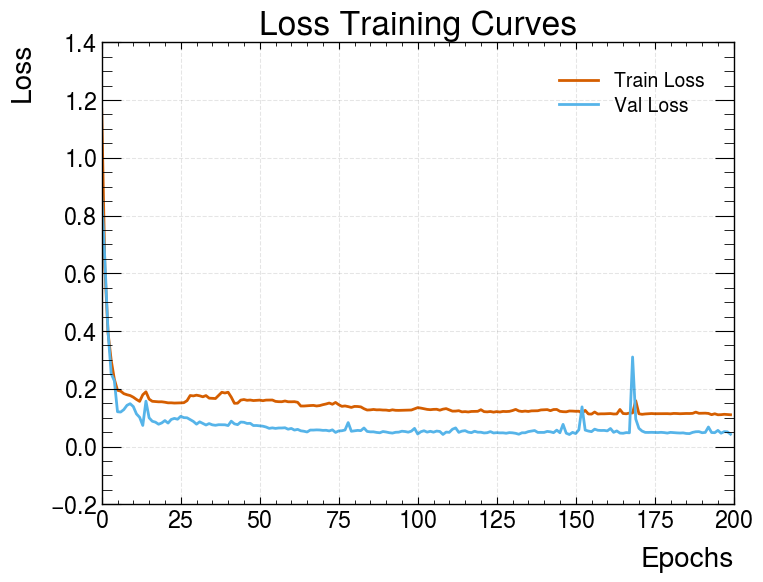

In [11]:
fig, ax = plt.subplots()
ax.grid(linestyle='--', alpha=0.1, color='k')
ax.plot(history_df.loc[max_sp_idx, 'loss'], label='Train Loss')
ax.plot(history_df.loc[max_sp_idx, 'val_loss'], label='Val Loss')
ax.legend()
ax.set(
    title='Loss Training Curves',
    xlabel='Epochs',
    ylabel='Loss'
)

[Text(0, 1, 'Fake Acceptance'), Text(1, 0, 'Epochs')]

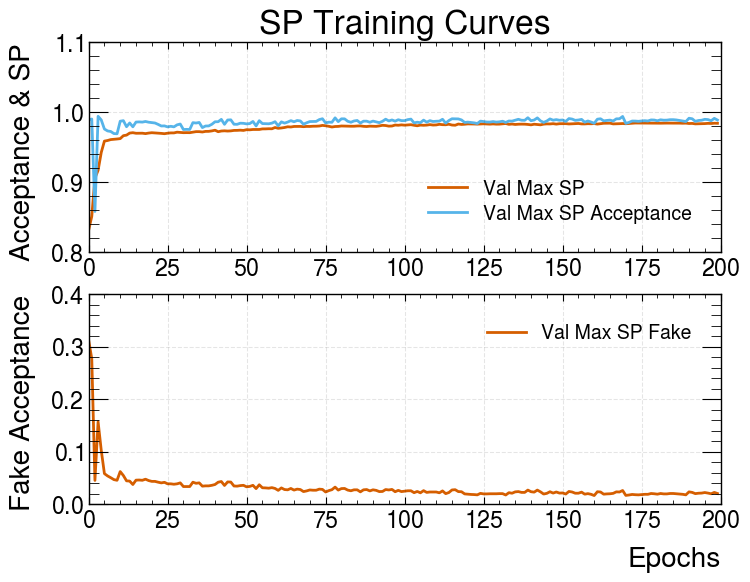

In [15]:
fig, axes = plt.subplots(2, 1)
for ax in axes.flatten():
    ax.grid(linestyle='--', alpha=0.1, color='k')
axes[0].plot(history_df.loc[max_sp_idx, 'max_sp_val'], label='Val Max SP')
axes[1].plot(history_df.loc[max_sp_idx, 'max_sp_fa_val'], label='Val Max SP Fake')
axes[0].plot(history_df.loc[max_sp_idx, 'max_sp_pd_val'], label='Val Max SP Acceptance')
axes[0].legend()
axes[1].legend()
axes[0].set(
    title='SP Training Curves',
    ylabel='Acceptance & SP',
)
axes[1].set(
    ylabel='Fake Acceptance',
    xlabel='Epochs'
)